###### import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [2]:

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 4s 0us/step


In [24]:
# Draw Graphs comparing loss and accuracy
def plot_graph(train_history):
  # Plot training & validation loss values
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(train_history.history['loss'], label='Training Loss')
  plt.plot(train_history.history['val_loss'], label='Validation Loss')
  plt.title('Model Loss ')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # Plot training & validation accuracy values
  plt.subplot(1, 2, 2)
  plt.plot(train_history.history['accuracy'], label='Training Accuracy')
  plt.plot(train_history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Model Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()


## 0
CNN neural network with 3 layer of Conv2d

In [3]:


# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 output classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])




In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [4]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/10
1563/1563 [==============================] - 19s 5ms/step - loss: 1.5283 - accuracy: 0.4409 - val_loss: 1.2407 - val_accuracy: 0.5520
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1615 - accuracy: 0.5872 - val_loss: 1.1232 - val_accuracy: 0.6045
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0054 - accuracy: 0.6465 - val_loss: 1.0479 - val_accuracy: 0.6253
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9149 - accuracy: 0.6796 - val_loss: 0.9483 - val_accuracy: 0.6661
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8439 - accuracy: 0.7054 - val_loss: 0.9404 - val_accuracy: 0.6794
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7877 - accuracy: 0.7250 - val_loss: 0.8753 - val_accuracy: 0.6968
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7383 - accuracy: 0.7405 - val_loss: 0.8672 - val_accuracy

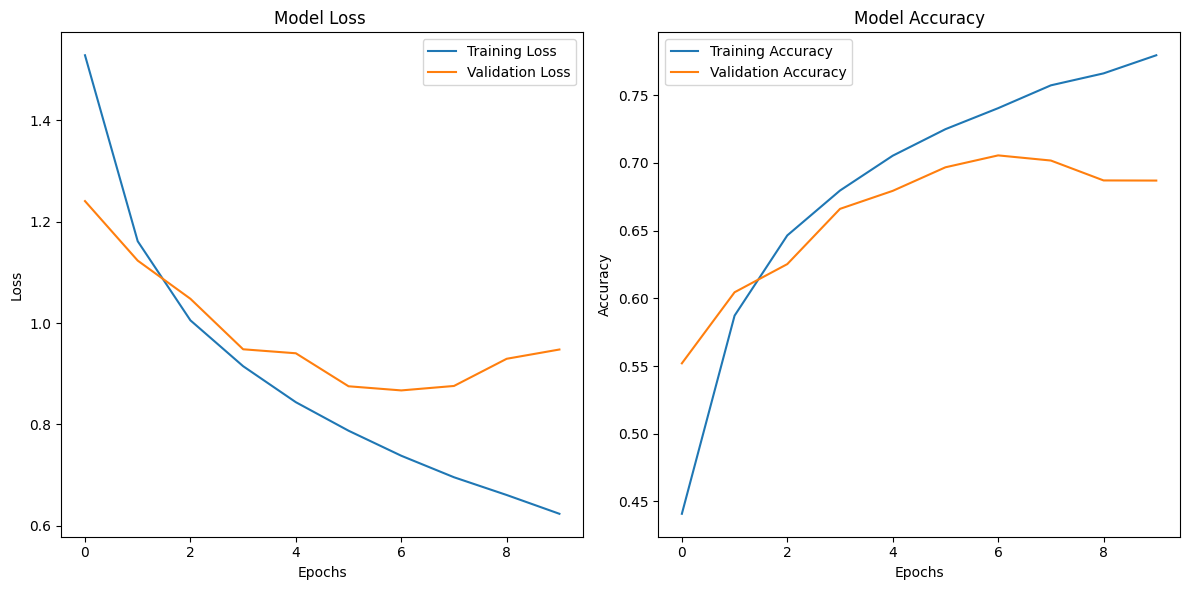

In [25]:
plot_graph(history)

## 1.
 Batch Normalization is a technique used in deep neural networks to improve training stability and convergence speed. It normalizes the activations of each layer in a mini-batch by subtracting the batch mean and dividing by the batch standard deviation. This helps to mitigate issues like vanishing or exploding gradients and allows for faster training. In Keras, we can easily add Batch Normalization layers to your model.

In [5]:
model_batchNormed = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10)  # 10 output classes for CIFAR-10

])

# Compile the model
model_batchNormed.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [14]:
model_batchNormed.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                      

In [6]:
# Train the model
history_model_batchNormed = model_batchNormed.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model_batchNormed.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/10
1563/1563 [==============================] - 15s 8ms/step - loss: 1.2846 - accuracy: 0.5473 - val_loss: 1.2244 - val_accuracy: 0.5621
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9476 - accuracy: 0.6669 - val_loss: 1.3020 - val_accuracy: 0.5502
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8217 - accuracy: 0.7129 - val_loss: 0.9184 - val_accuracy: 0.6799
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7338 - accuracy: 0.7467 - val_loss: 0.9743 - val_accuracy: 0.6659
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6586 - accuracy: 0.7702 - val_loss: 1.0773 - val_accuracy: 0.6386
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5971 - accuracy: 0.7918 - val_loss: 0.8554 - val_accuracy: 0.7144
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5406 - accuracy: 0.8105 - val_loss: 1.2855 - val_ac

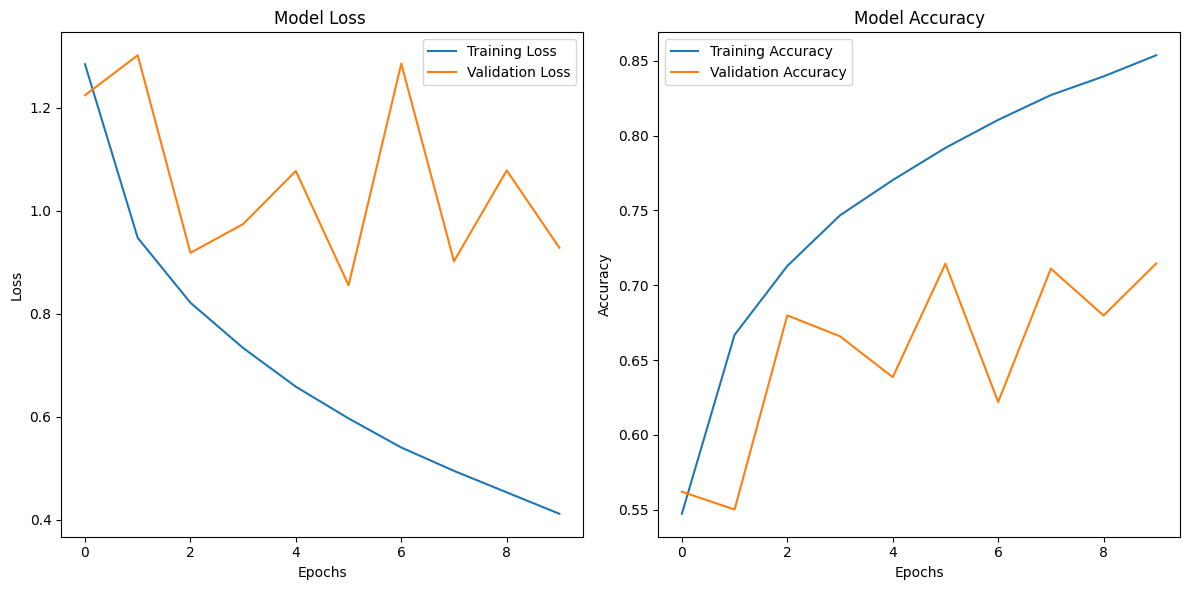

In [26]:
plot_graph(history_model_batchNormed)

##2.
Adding dropout layers to neural network can help prevent overfitting by randomly dropping out (setting to zero) a fraction of the units during each forward and backward pass.

In [7]:
model_dropout = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Add dropout with a 50% dropout rate
    layers.Dense(10)  # 10 output classes for CIFAR-10
])

# Compile the model
model_dropout.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model_dropout.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_4 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                      

In [8]:
# Train the model
history_model_dropout = model_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model_dropout.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/10
1563/1563 [==============================] - 14s 7ms/step - loss: 1.5696 - accuracy: 0.4552 - val_loss: 1.2573 - val_accuracy: 0.5513
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1504 - accuracy: 0.5972 - val_loss: 0.9987 - val_accuracy: 0.6478
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0065 - accuracy: 0.6535 - val_loss: 0.9242 - val_accuracy: 0.6760
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9066 - accuracy: 0.6887 - val_loss: 0.9710 - val_accuracy: 0.6642
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8394 - accuracy: 0.7150 - val_loss: 0.8751 - val_accuracy: 0.6967
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7820 - accuracy: 0.7318 - val_loss: 0.8782 - val_accuracy: 0.6936
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7352 - accuracy: 0.7484 - val_loss: 0.7862 - val_ac

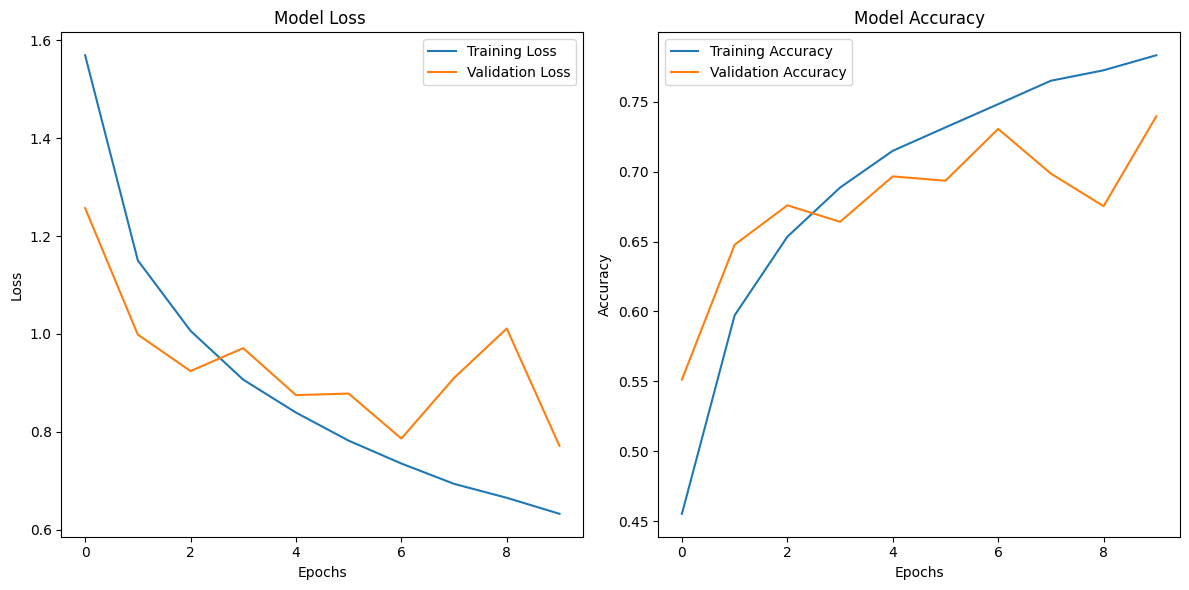

In [27]:
plot_graph(history_model_dropout)

Observation:
Difference between training and validation accuracy is also smaller than pervious methods

##3
Changing count of convoluation and pooling layer. I added two more convolutional layers and pooling layers to create a deeper architecture. You can experiment with different numbers of layers and filter sizes to find the architecture that works best for your specific problem.

In [11]:

# Define the CNN model with Batch Normalization and Dropout
model_deep = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10)
])

# Compile the model
model_deep.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [16]:
model_deep.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_16 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 batch_normalization_17 (Ba  (None, 12, 12, 64)       

In [12]:


# Train the model
history_model_deep = model_deep.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model_deep.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)


Epoch 1/10
1563/1563 [==============================] - 20s 9ms/step - loss: 1.5975 - accuracy: 0.4465 - val_loss: 1.5452 - val_accuracy: 0.4966
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0351 - accuracy: 0.6405 - val_loss: 0.9388 - val_accuracy: 0.6668
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8603 - accuracy: 0.7053 - val_loss: 0.9199 - val_accuracy: 0.6853
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7549 - accuracy: 0.7430 - val_loss: 0.8926 - val_accuracy: 0.6937
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6680 - accuracy: 0.7745 - val_loss: 0.9279 - val_accuracy: 0.6888
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6053 - accuracy: 0.7946 - val_loss: 0.7648 - val_accuracy: 0.7451
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5450 - accuracy: 0.8156 - val_loss: 0.7287 - val_ac

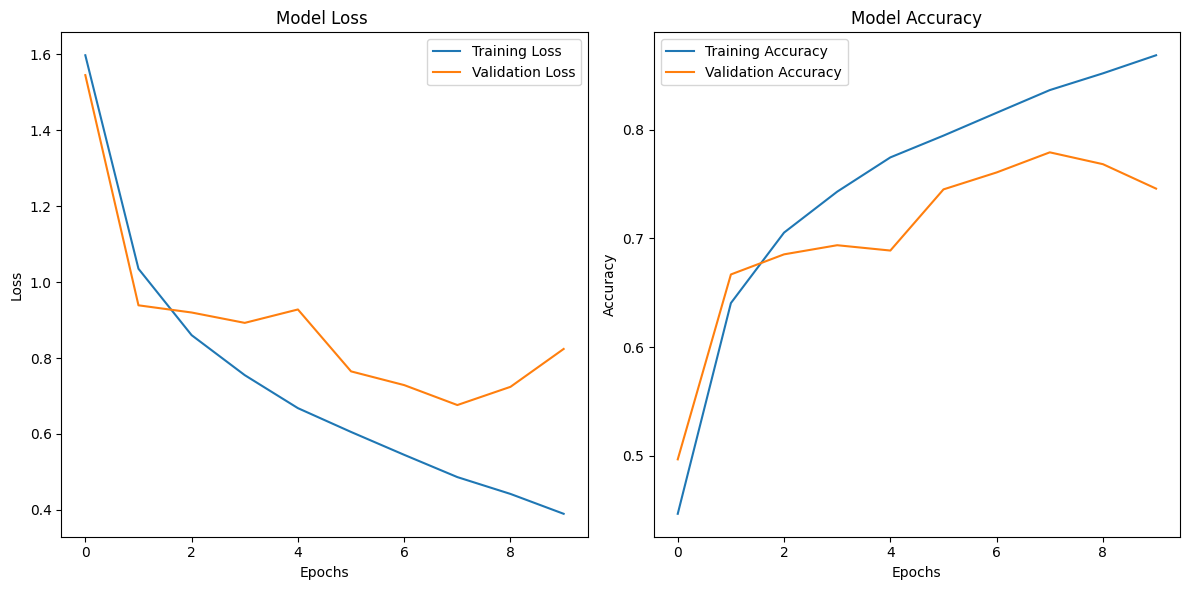

In [28]:
plot_graph(history_model_deep)

## 4
Changing Activation functions

In [17]:
model_acitvation = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='elu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='elu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='elu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='elu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Add dropout with a 50% dropout rate
    layers.Dense(10)  # 10 output classes for CIFAR-10
])

# Compile the model
model_acitvation.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:

# Train the model
history_model_acitvation = model_acitvation.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model_acitvation.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/10
1563/1563 [==============================] - 14s 7ms/step - loss: 1.5447 - accuracy: 0.4701 - val_loss: 1.8394 - val_accuracy: 0.3784
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1103 - accuracy: 0.6146 - val_loss: 1.1048 - val_accuracy: 0.6089
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9767 - accuracy: 0.6638 - val_loss: 1.0702 - val_accuracy: 0.6185
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8810 - accuracy: 0.6984 - val_loss: 0.9024 - val_accuracy: 0.6815
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8210 - accuracy: 0.7184 - val_loss: 0.9891 - val_accuracy: 0.6606
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7699 - accuracy: 0.7390 - val_loss: 1.1703 - val_accuracy: 0.6011
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7206 - accuracy: 0.7548 - val_loss: 1.0093 - val_ac

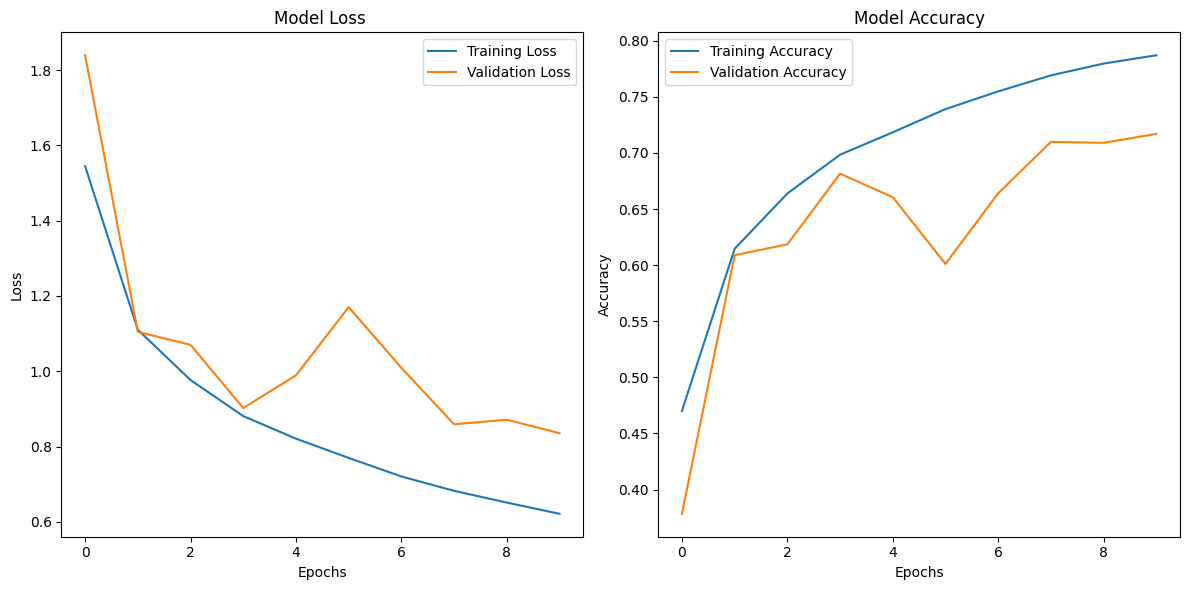

In [29]:
plot_graph(history_model_acitvation)